In [7]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [5]:
np.random.seed(42)

set1no = 900
set2no = 100

In [6]:
## dataframe with imbalanced data set
df1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=set1no),
    'feature_2': np.random.normal(loc=0, scale=1, size=set1no),
    'target': [0] * set1no
})

df2 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=set2no),
    'feature_2': np.random.normal(loc=2, scale=1, size=set2no),
    'target': [1] * set2no
})

<Axes: >

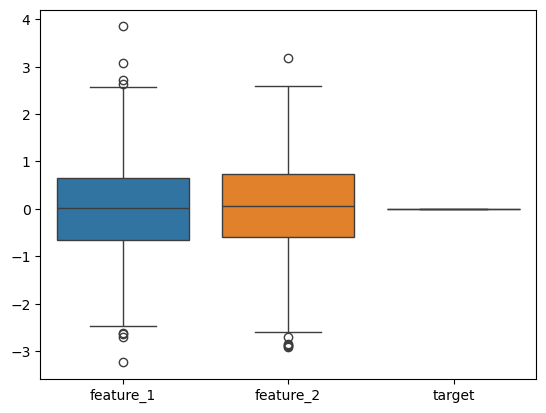

In [8]:
sns.boxplot(data=df1)

In [12]:
df=pd.concat([df1,df2]).reset_index(drop=True)

In [13]:
df

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1


In [14]:
df["target"].unique()

array([0, 1])

In [15]:
df["target"].value_counts()

target
0    900
1    100
Name: count, dtype: int64

## Resampling

In [36]:
df_majority = df[df["target"] == 0]
df_minority = df[df["target"] == 1]

In [31]:
df_majority

,feature_1,feature_2,target
0,0.496714,0.368673,0
1,-0.138264,-0.393339,0
2,0.647689,0.028745,0
3,1.523030,1.278452,0
4,-0.234153,0.191099,0
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [32]:
from sklearn.utils import resample

In [33]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=len(df_majority),random_state=42)

In [34]:
df_minority_upsampled

,feature_1,feature_2,target
951,3.775311,3.261922,1
992,1.563614,3.188913,1
914,1.731469,0.198942,1
971,1.785079,-0.940389,1
960,1.865691,1.945106,1
...,...,...,...
952,0.806363,1.094268,1
965,0.337508,2.089581,1
976,1.437832,3.124113,1
942,1.451275,2.269127,1


In [39]:
df_Upsampled= pd.concat([df_minority_upsampled,df_majority])

In [40]:
df_Upsampled

,feature_1,feature_2,target
951,3.775311,3.261922,1
992,1.563614,3.188913,1
914,1.731469,0.198942,1
971,1.785079,-0.940389,1
960,1.865691,1.945106,1
...,...,...,...
895,0.648710,-0.751969,0
896,-0.167118,-0.319054,0
897,0.146714,-0.796026,0
898,1.206509,1.076007,0


In [41]:
df_majority_DownSampled = resample(df_majority,replace=True,n_samples=len(df_minority),random_state=42)

In [42]:
df_majority_DownSampled 

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
201,0.560785,-2.896255,0
269,0.130741,0.853416,0
862,1.547505,0.075434,0
815,-1.485560,-0.090533,0


In [43]:
pd.concat([df_majority_DownSampled,df_minority])

,feature_1,feature_2,target
102,-0.342715,0.059630,0
435,0.074095,-0.337086,0
860,0.202923,1.639965,0
270,1.441273,0.758929,0
106,1.886186,0.895193,0
...,...,...,...
995,1.629989,3.070150,1
996,1.741204,1.973479,1
997,3.598647,1.118125,1
998,2.560919,1.836933,1
